# II Experimentation on effective data from philippines

In [3]:
# Initialisations
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)
from extraction import *
from preprocess import *
from parameters import *
from  model.MDBN import MDBN
import time
import pickle
import argparse
from sklearn import metrics #confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split


## 1. Chargement des données.

In [9]:
data = {}
data[0] = np.load('./data/phili2017/features/origin/ar.npy'),np.load('./data/phili2017/labels/labels_ar.npy')
data[1] = np.load('./data/phili2017/features/origin/si.npy'),np.load('./data/phili2017/labels/labels_si.npy')
data[2] = np.load('./data/phili2017/features/origin/vv.npy'),np.load('./data/phili2017/labels/labels_vv.npy')
data[3] = np.load('./data/phili2017/features/origin/sg.npy'),np.load('./data/phili2017/labels/labels_sg.npy')

## 2. Definition des traces d'apprentissages du système

In [10]:
LS = ['Processing', 'Perception', 'Input', 'Understanding']

In [11]:
Classes = {} #Style d'apprentissage
Classes[0] = ["Active","Reflective"]
Classes[1] = ["Sensitive","Intuitive"]
Classes[2] = ["Visual","Verbal"] 
Classes[3] = ["Sequential","Global"] 
FSLSM = ["AR","SI","VV","SG"]

In [12]:
targets = {}
for i in range(0, len(data)):
    targets[i] = data[i][1]

In [13]:
for i in range(0, len(data)):
    nb1 = (targets[i]==1).sum()
    nb2 = (targets[i]==-1).sum()
    print ("Felder's Dimension: ",LS[i],"\t",Classes [i][0], ": ",nb1, "\n\t\t\t\t\t",Classes [i][1], ": ",nb2)

Felder's Dimension:  Processing 	 Active :  244 
					 Reflective :  263
Felder's Dimension:  Perception 	 Sensitive :  159 
					 Intuitive :  348
Felder's Dimension:  Input 	 Visual :  388 
					 Verbal :  119
Felder's Dimension:  Understanding 	 Sequential :  250 
					 Global :  257


## 3. Test data on dummy classifier

In [14]:
from sklearn.dummy import DummyClassifier

In [15]:
def evaluation_surclassifieur_naif(pos):
    X_train, X_test, Y_train, Y_test  = train_test_split(data[pos][0],targets[pos], test_size=0.2,random_state=0)
    # DummyClassifier to predict only target 0
    print("Classifieur Naif pour: ",LS[pos])
    dummy = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
    dummy_pred = dummy.predict(X_test)

    # checking unique labels
    print('Style d\'apprentissage majoritaire prédit: ', Classes[pos][int(np.unique(dummy_pred))])

    # checking accuracy
    print('Test score: ', metrics.accuracy_score(Y_test, dummy_pred))

In [16]:
evaluation_surclassifieur_naif(0)

Classifieur Naif pour:  Processing
Style d'apprentissage majoritaire prédit:  Reflective
Test score:  0.5490196078431373


In [17]:
evaluation_surclassifieur_naif(1)

Classifieur Naif pour:  Perception
Style d'apprentissage majoritaire prédit:  Intuitive
Test score:  0.7941176470588235


In [18]:
evaluation_surclassifieur_naif(2)

Classifieur Naif pour:  Input
Style d'apprentissage majoritaire prédit:  Verbal
Test score:  0.7254901960784313


In [19]:
evaluation_surclassifieur_naif(3)

Classifieur Naif pour:  Understanding
Style d'apprentissage majoritaire prédit:  Global
Test score:  0.49019607843137253


### save features

In [41]:
def save_features(data,targets,pos,saved=True):
    X =data[pos][0]
    y =targets[pos]
    digitized = discretize_learning_traces(X)
    X_train_feats = binarized_features2(digitized,digitized.shape[1])
    if saved:
        np.save("ls_"+LS[pos]+".npy",X_train_feats)
        np.save("label_"+LS[pos]+".npy",y)
    return X_train_feats, y

In [65]:
def save_features2(data,targets,pos,saved=True):
    X =data[pos][0]
    y =targets[pos]
    digitized = discretize_learning_traces(X)
    #print("discretized learning: \n",digitized[0:5])
    digitized2 = discretize_learning_traces2(X)
    print("discretized learning Strategy 2: \n",digitized2[0:5])    
    X_train_feats = binarized_features(digitized,3*digitized.shape[1])
    if saved:
        np.save("qt_"+LS[pos]+".npy",X_train_feats)
        #np.save("label_"+LS[pos]+".npy",y)
    return X_train_feats, y

In [66]:
#save_features(data,targets,0,saved=True)

In [67]:
#save_features(data,targets,1,saved=True)

In [68]:
#save_features(data,targets,2,saved=True)

In [69]:
#save_features(data,targets,3,saved=True)

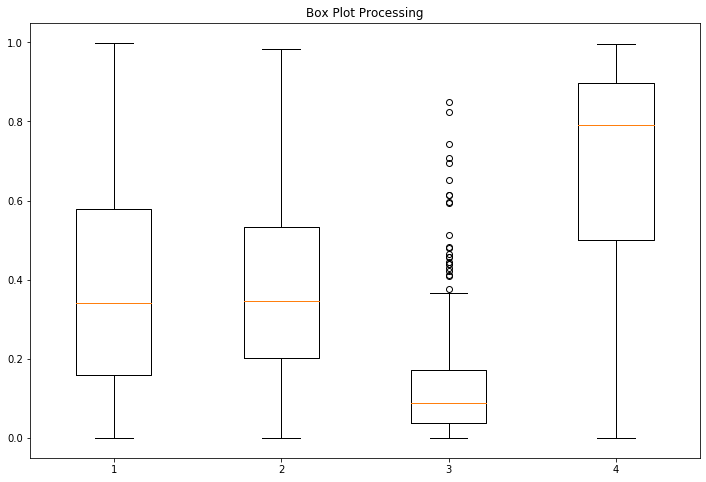

In [70]:
print_box_blot(data[0][0],LS[0])

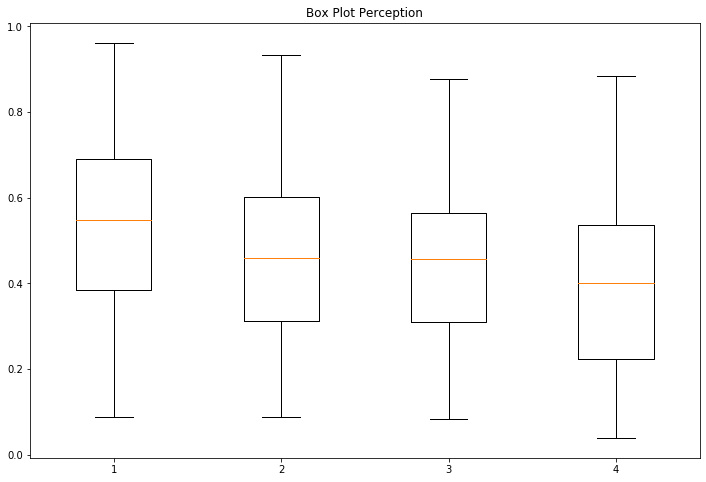

In [71]:
print_box_blot(data[1][0],LS[1])

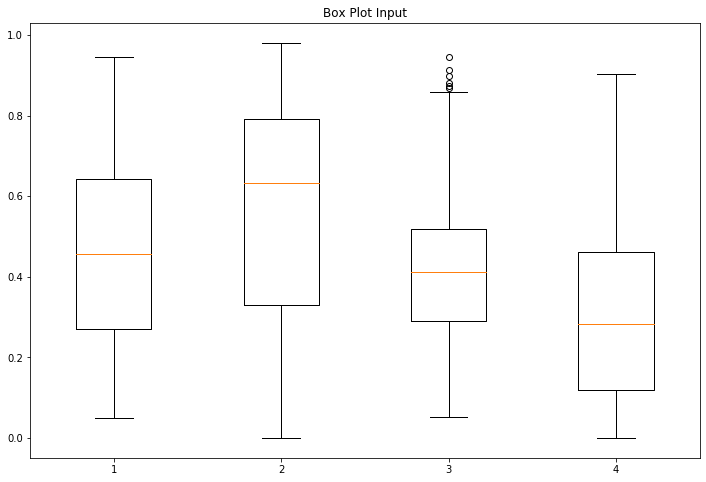

In [72]:
print_box_blot(data[2][0],LS[2])

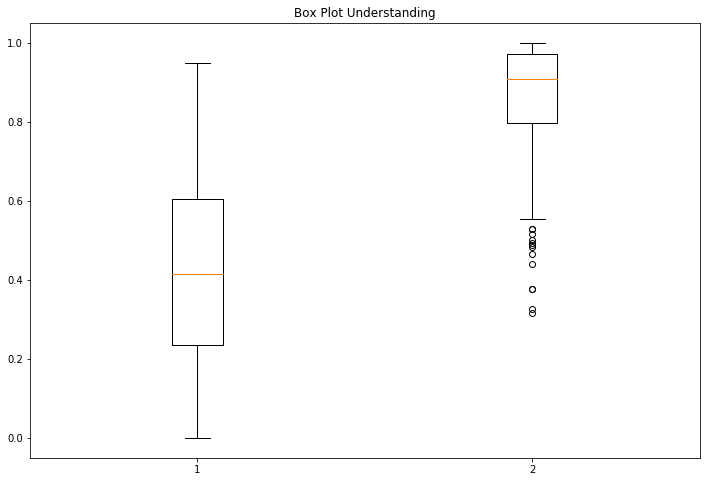

In [73]:
print_box_blot(data[3][0],LS[3])

In [75]:
X_train_feats, y =save_features2(data,targets,0,saved=True)

discretized learning Strategy 2: 
 [[0. 0. 8. 6.]
 [4. 2. 3. 0.]
 [7. 4. 7. 6.]
 [3. 0. 8. 0.]
 [1. 1. 8. 3.]]


In [80]:
np.random.seed(1337)  # for reproducibility
def Select_features_MLSIM(pos):
    X = data[pos][0][:,0:3]
    print(data[pos][0][0:3])
    print(X[0:3])
    digitized = discretize_learning_traces(X)
    print("digitized: ",digitized[0:3])
    X_train_feats = binarized_features(digitized,3*digitized.shape[1])
    print(X_train_feats[0:3])
    np.save("filt_"+LS[pos]+".npy",X_train_feats)
    

In [81]:
Select_features_MLSIM(0)

[[ 1  2  8 27]
 [11  6  3  0]
 [21 10  7 29]]
[[ 1  2  8]
 [11  6  3]
 [21 10  7]]
digitized:  [[2 3 4]
 [4 4 4]
 [4 4 4]]
[[0. 1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]]


In [83]:
Select_features_MLSIM(0)

[[ 1  2  8 27]
 [11  6  3  0]
 [21 10  7 29]]
[[ 1  2  8]
 [11  6  3]
 [21 10  7]]
digitized:  [[2 3 4]
 [4 4 4]
 [4 4 4]]
[[0. 1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]]


### 4. Test sur modele

In [84]:
np.random.seed(1337)  # for reproducibility
def evaluation_model_MLSIM(pos):
    X = data[pos][0][:,0:3]
    print(data[pos][0][0:3])
    print(X[0:3])
    #return
    X_train, X_test, Y_train, Y_test  = train_test_split(X,targets[pos], test_size=0.2,random_state=0)    
    digitized = discretize_learning_traces(X_train)
    X_train_feats = binarized_features2(digitized,X_train.shape[1])
    print("Model MLSIM pour: ",LS[pos])
    n = np.shape(X_train_feats)[0]
    m = np.shape(X_train_feats)[1]
    print (n,m)
    print ("Nbr students:", n)
    print ("Learning traces dimension:",m)
    # construct DBN
    nhid_param2 = 10 #HYPERPARAMS.nb_hiden_node2 #nobre de noeuds de la deuxime couche cachée
    nhid_param1 = 5 #HYPERPARAMS.nb_hiden_node1 #nobre de noeuds de la premiere couche cachée
    #dbn = MDBN(input_data=X_train_feats, label=Y_train, input_size=m, hidden_layer_sizes=[nhid_param1, nhid_param2], output_size=1, batch_size=Training.batch_size, learning_rate=HYPERPARAMS.learning_rate,epochs=Training.epochs, C=HYPERPARAMS.C)
    dbn = MDBN(input_data=X_train_feats, label=Y_train, input_size=m, hidden_layer_sizes=[nhid_param1, nhid_param2], output_size=1, batch_size=32, learning_rate=0.3,epochs=700, C=0.60)    
    start = time.time()
    # pre-training (TrainUnsupervisedDBN)
    print ("Training the Hybrid Deep Belief Net model \n................")
    dbn.train(X_train_feats)
    print ("Unsupervised training time: ",(time.time()-start)," seconds")
    # fine-tuning (DBNSupervisedFineTuning)
    synthetic_V_list, h_list = dbn.predict(X_train_feats)
    print("Original Features:",X_train_feats[0:3])
    print("Visible Features at the end of the DBN",synthetic_V_list[-1][0:3])
    print("Hidden Features at the end of the DBN",h_list[-1][0:3])
    #finetune training the last layer
    dbn.finetune(X_train_feats,Y_train,"Train data",bytraining=True)
    digitized_test = discretize_learning_traces(X_test)
    X_test_feats = binarized_features2(digitized_test,X_test.shape[1])
    accuracy = dbn.evaluate(X_test_feats,Y_test,"Test data",verbose=True)    

In [19]:
evaluation_model_MLSIM(0)

[[ 1  2  8 27]
 [11  6  3  0]
 [21 10  7 29]]
[[ 1  2  8]
 [11  6  3]
 [21 10  7]]
Model MLSIM pour:  Processing
405 12
Nbr students: 405
Learning traces dimension: 12
Initialize weigths [[-3.96625542e-02 -5.68860046e-02 -3.69789134e-02 -6.78051880e-03
  -2.98332432e-02  3.06547010e-03 -3.96761791e-02  7.93475475e-02
   3.88024254e-02 -6.41209622e-02 -1.89541552e-02  2.14168633e-02]
 [-6.24903456e-02  8.05914342e-02 -9.46252189e-03  4.82597237e-02
   4.90197626e-02 -2.31230713e-02 -1.39826767e-02  1.40430214e-02
   4.33619623e-02 -5.20319324e-02 -3.53054754e-02  2.83698097e-02]
 [-5.86231047e-05 -5.35718871e-02 -1.44764498e-02 -5.01341275e-02
   5.28323393e-03  5.53951172e-02 -5.24581758e-02  7.62265373e-02
  -1.24308891e-02  6.67839860e-04  1.74515780e-03 -8.07014246e-02]
 [ 3.86150114e-02  8.22175066e-02 -5.61870778e-02 -6.22275367e-02
  -2.08609692e-02  3.22032407e-02 -8.28498283e-02 -2.17951563e-02
  -7.35534457e-02  4.82226808e-02 -2.50384646e-02  3.37539533e-02]
 [-1.46182046e-03

/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


>> Epoch 3 finished 	RBM 1 Reconstruction error 4.171941 	Weigths 2.528331 hbias 0.809332 vbias 2.089743  
>> Epoch 4 finished 	RBM 1 Reconstruction error 4.047551 	Weigths 2.751321 hbias 0.852411 vbias 2.254031  
>> Epoch 5 finished 	RBM 1 Reconstruction error 3.972569 	Weigths 2.936959 hbias 0.892360 vbias 2.390334  
>> Epoch 6 finished 	RBM 1 Reconstruction error 3.918211 	Weigths 3.107137 hbias 0.926813 vbias 2.504265  
>> Epoch 7 finished 	RBM 1 Reconstruction error 3.884663 	Weigths 3.249305 hbias 0.954739 vbias 2.588069  
>> Epoch 8 finished 	RBM 1 Reconstruction error 3.863709 	Weigths 3.335415 hbias 0.967160 vbias 2.647939  
>> Epoch 9 finished 	RBM 1 Reconstruction error 3.847320 	Weigths 3.398366 hbias 0.973612 vbias 2.696110  
>> Epoch 10 finished 	RBM 1 Reconstruction error 3.837823 	Weigths 3.468225 hbias 0.979942 vbias 2.733309  
>> Epoch 11 finished 	RBM 1 Reconstruction error 3.827925 	Weigths 3.524410 hbias 0.985283 vbias 2.774517  
>> Epoch 12 finished 	RBM 1 Reconst

>> Epoch 81 finished 	RBM 1 Reconstruction error 3.530237 	Weigths 4.886663 hbias 0.604443 vbias 3.027818  
>> Epoch 82 finished 	RBM 1 Reconstruction error 3.524520 	Weigths 4.884549 hbias 0.619820 vbias 3.044080  
>> Epoch 83 finished 	RBM 1 Reconstruction error 3.518422 	Weigths 4.923719 hbias 0.617937 vbias 3.053014  
>> Epoch 84 finished 	RBM 1 Reconstruction error 3.511830 	Weigths 4.948561 hbias 0.625499 vbias 3.066618  
>> Epoch 85 finished 	RBM 1 Reconstruction error 3.507356 	Weigths 4.943727 hbias 0.643841 vbias 3.091913  
>> Epoch 86 finished 	RBM 1 Reconstruction error 3.498647 	Weigths 4.994936 hbias 0.639696 vbias 3.093512  
>> Epoch 87 finished 	RBM 1 Reconstruction error 3.493931 	Weigths 4.993918 hbias 0.660148 vbias 3.094849  
>> Epoch 88 finished 	RBM 1 Reconstruction error 3.493279 	Weigths 5.097936 hbias 0.630087 vbias 3.116436  
>> Epoch 89 finished 	RBM 1 Reconstruction error 3.480022 	Weigths 5.079594 hbias 0.666082 vbias 3.143293  
>> Epoch 90 finished 	RBM 1 

>> Epoch 159 finished 	RBM 1 Reconstruction error 2.674595 	Weigths 7.672748 hbias 1.647098 vbias 3.687504  
>> Epoch 160 finished 	RBM 1 Reconstruction error 2.669768 	Weigths 7.722551 hbias 1.651141 vbias 3.700765  
>> Epoch 161 finished 	RBM 1 Reconstruction error 2.665439 	Weigths 7.796037 hbias 1.646001 vbias 3.706407  
>> Epoch 162 finished 	RBM 1 Reconstruction error 2.651301 	Weigths 7.829741 hbias 1.663378 vbias 3.732559  
>> Epoch 163 finished 	RBM 1 Reconstruction error 2.638139 	Weigths 7.856390 hbias 1.694370 vbias 3.764710  
>> Epoch 164 finished 	RBM 1 Reconstruction error 2.625135 	Weigths 7.896525 hbias 1.714945 vbias 3.777976  
>> Epoch 165 finished 	RBM 1 Reconstruction error 2.617111 	Weigths 7.931966 hbias 1.723522 vbias 3.793083  
>> Epoch 166 finished 	RBM 1 Reconstruction error 2.614562 	Weigths 7.983839 hbias 1.724367 vbias 3.784209  
>> Epoch 167 finished 	RBM 1 Reconstruction error 2.608259 	Weigths 8.038482 hbias 1.728331 vbias 3.784800  
>> Epoch 168 finish

>> Epoch 237 finished 	RBM 1 Reconstruction error 2.077492 	Weigths 10.878755 hbias 2.570210 vbias 4.762838  
>> Epoch 238 finished 	RBM 1 Reconstruction error 2.075134 	Weigths 10.917354 hbias 2.570635 vbias 4.794382  
>> Epoch 239 finished 	RBM 1 Reconstruction error 2.072875 	Weigths 10.965540 hbias 2.573006 vbias 4.793451  
>> Epoch 240 finished 	RBM 1 Reconstruction error 2.064721 	Weigths 10.994317 hbias 2.585241 vbias 4.797267  
>> Epoch 241 finished 	RBM 1 Reconstruction error 2.055791 	Weigths 11.037884 hbias 2.594291 vbias 4.781186  
>> Epoch 242 finished 	RBM 1 Reconstruction error 2.053088 	Weigths 11.069796 hbias 2.605688 vbias 4.790390  
>> Epoch 243 finished 	RBM 1 Reconstruction error 2.049275 	Weigths 11.107298 hbias 2.609699 vbias 4.838104  
>> Epoch 244 finished 	RBM 1 Reconstruction error 2.042402 	Weigths 11.156174 hbias 2.611988 vbias 4.865609  
>> Epoch 245 finished 	RBM 1 Reconstruction error 2.040750 	Weigths 11.198784 hbias 2.614693 vbias 4.892338  
>> Epoch 2

>> Epoch 312 finished 	RBM 1 Reconstruction error 1.795879 	Weigths 13.430026 hbias 3.256000 vbias 5.659829  
>> Epoch 313 finished 	RBM 1 Reconstruction error 1.791894 	Weigths 13.464199 hbias 3.267941 vbias 5.654509  
>> Epoch 314 finished 	RBM 1 Reconstruction error 1.789353 	Weigths 13.483398 hbias 3.280798 vbias 5.687209  
>> Epoch 315 finished 	RBM 1 Reconstruction error 1.786110 	Weigths 13.525779 hbias 3.282352 vbias 5.685722  
>> Epoch 316 finished 	RBM 1 Reconstruction error 1.785638 	Weigths 13.560024 hbias 3.277764 vbias 5.700533  
>> Epoch 317 finished 	RBM 1 Reconstruction error 1.785709 	Weigths 13.595854 hbias 3.274668 vbias 5.722888  
>> Epoch 318 finished 	RBM 1 Reconstruction error 1.781502 	Weigths 13.605553 hbias 3.301631 vbias 5.753135  
>> Epoch 319 finished 	RBM 1 Reconstruction error 1.781855 	Weigths 13.633083 hbias 3.309449 vbias 5.777315  
>> Epoch 320 finished 	RBM 1 Reconstruction error 1.778042 	Weigths 13.663429 hbias 3.319174 vbias 5.753211  
>> Epoch 3

>> Epoch 387 finished 	RBM 1 Reconstruction error 1.645435 	Weigths 15.292141 hbias 3.879754 vbias 6.623509  
>> Epoch 388 finished 	RBM 1 Reconstruction error 1.642679 	Weigths 15.327650 hbias 3.880467 vbias 6.619846  
>> Epoch 389 finished 	RBM 1 Reconstruction error 1.640330 	Weigths 15.346636 hbias 3.896509 vbias 6.616201  
>> Epoch 390 finished 	RBM 1 Reconstruction error 1.639441 	Weigths 15.367712 hbias 3.906171 vbias 6.620937  
>> Epoch 391 finished 	RBM 1 Reconstruction error 1.637522 	Weigths 15.388409 hbias 3.912346 vbias 6.643475  
>> Epoch 392 finished 	RBM 1 Reconstruction error 1.638003 	Weigths 15.405545 hbias 3.915560 vbias 6.674171  
>> Epoch 393 finished 	RBM 1 Reconstruction error 1.633342 	Weigths 15.430388 hbias 3.929945 vbias 6.680067  
>> Epoch 394 finished 	RBM 1 Reconstruction error 1.633533 	Weigths 15.455714 hbias 3.927136 vbias 6.695083  
>> Epoch 395 finished 	RBM 1 Reconstruction error 1.628387 	Weigths 15.471204 hbias 3.949927 vbias 6.715995  
>> Epoch 3

>> Epoch 462 finished 	RBM 1 Reconstruction error 1.496718 	Weigths 16.803019 hbias 4.497616 vbias 7.483603  
>> Epoch 463 finished 	RBM 1 Reconstruction error 1.494884 	Weigths 16.816151 hbias 4.516781 vbias 7.487293  
>> Epoch 464 finished 	RBM 1 Reconstruction error 1.495048 	Weigths 16.835355 hbias 4.506965 vbias 7.523755  
>> Epoch 465 finished 	RBM 1 Reconstruction error 1.494357 	Weigths 16.863245 hbias 4.511500 vbias 7.528810  
>> Epoch 466 finished 	RBM 1 Reconstruction error 1.494150 	Weigths 16.883708 hbias 4.507754 vbias 7.539679  
>> Epoch 467 finished 	RBM 1 Reconstruction error 1.492690 	Weigths 16.895757 hbias 4.517153 vbias 7.557719  
>> Epoch 468 finished 	RBM 1 Reconstruction error 1.486218 	Weigths 16.907162 hbias 4.543810 vbias 7.572290  
>> Epoch 469 finished 	RBM 1 Reconstruction error 1.480179 	Weigths 16.928524 hbias 4.559353 vbias 7.578795  
>> Epoch 470 finished 	RBM 1 Reconstruction error 1.478822 	Weigths 16.937362 hbias 4.576784 vbias 7.595273  
>> Epoch 4

>> Epoch 537 finished 	RBM 1 Reconstruction error 1.317716 	Weigths 18.245961 hbias 5.021932 vbias 8.314973  
>> Epoch 538 finished 	RBM 1 Reconstruction error 1.318243 	Weigths 18.253827 hbias 5.027980 vbias 8.351849  
>> Epoch 539 finished 	RBM 1 Reconstruction error 1.315363 	Weigths 18.270164 hbias 5.041685 vbias 8.362352  
>> Epoch 540 finished 	RBM 1 Reconstruction error 1.313043 	Weigths 18.278551 hbias 5.060131 vbias 8.376950  
>> Epoch 541 finished 	RBM 1 Reconstruction error 1.311119 	Weigths 18.313822 hbias 5.046126 vbias 8.371314  
>> Epoch 542 finished 	RBM 1 Reconstruction error 1.307692 	Weigths 18.338035 hbias 5.050168 vbias 8.365516  
>> Epoch 543 finished 	RBM 1 Reconstruction error 1.309127 	Weigths 18.347922 hbias 5.051385 vbias 8.408205  
>> Epoch 544 finished 	RBM 1 Reconstruction error 1.306955 	Weigths 18.362229 hbias 5.067566 vbias 8.422036  
>> Epoch 545 finished 	RBM 1 Reconstruction error 1.303649 	Weigths 18.378615 hbias 5.075998 vbias 8.420350  
>> Epoch 5

>> Epoch 612 finished 	RBM 1 Reconstruction error 1.152761 	Weigths 19.624907 hbias 5.438794 vbias 9.023073  
>> Epoch 613 finished 	RBM 1 Reconstruction error 1.148218 	Weigths 19.653090 hbias 5.433385 vbias 9.022468  
>> Epoch 614 finished 	RBM 1 Reconstruction error 1.145193 	Weigths 19.679385 hbias 5.435816 vbias 9.012753  
>> Epoch 615 finished 	RBM 1 Reconstruction error 1.141616 	Weigths 19.693774 hbias 5.459688 vbias 9.008573  
>> Epoch 616 finished 	RBM 1 Reconstruction error 1.140096 	Weigths 19.710421 hbias 5.459568 vbias 9.026134  
>> Epoch 617 finished 	RBM 1 Reconstruction error 1.138228 	Weigths 19.729799 hbias 5.463543 vbias 9.034604  
>> Epoch 618 finished 	RBM 1 Reconstruction error 1.136395 	Weigths 19.764832 hbias 5.454115 vbias 9.034482  
>> Epoch 619 finished 	RBM 1 Reconstruction error 1.135763 	Weigths 19.776198 hbias 5.458820 vbias 9.054763  
>> Epoch 620 finished 	RBM 1 Reconstruction error 1.134997 	Weigths 19.779244 hbias 5.473738 vbias 9.088913  
>> Epoch 6

>> Epoch 687 finished 	RBM 1 Reconstruction error 1.006908 	Weigths 20.955746 hbias 5.808861 vbias 9.637039  
>> Epoch 688 finished 	RBM 1 Reconstruction error 1.004898 	Weigths 20.978515 hbias 5.805066 vbias 9.632408  
>> Epoch 689 finished 	RBM 1 Reconstruction error 1.004180 	Weigths 20.989267 hbias 5.810261 vbias 9.651258  
>> Epoch 690 finished 	RBM 1 Reconstruction error 1.002733 	Weigths 21.015427 hbias 5.801071 vbias 9.650598  
>> Epoch 691 finished 	RBM 1 Reconstruction error 0.999911 	Weigths 21.041020 hbias 5.789714 vbias 9.653743  
>> Epoch 692 finished 	RBM 1 Reconstruction error 0.998450 	Weigths 21.046804 hbias 5.793617 vbias 9.679569  
>> Epoch 693 finished 	RBM 1 Reconstruction error 0.999025 	Weigths 21.079307 hbias 5.772711 vbias 9.675512  
>> Epoch 694 finished 	RBM 1 Reconstruction error 0.995303 	Weigths 21.095247 hbias 5.781613 vbias 9.692798  
>> Epoch 695 finished 	RBM 1 Reconstruction error 0.992119 	Weigths 21.102339 hbias 5.803903 vbias 9.692323  
>> Epoch 6

>> Epoch 64 finished 	RBM 2 Reconstruction error 2.357057 	Weigths 3.145411 hbias 0.885080 vbias 0.934447  
>> Epoch 65 finished 	RBM 2 Reconstruction error 2.342564 	Weigths 3.232776 hbias 0.885519 vbias 0.963060  
>> Epoch 66 finished 	RBM 2 Reconstruction error 2.324219 	Weigths 3.270407 hbias 0.902771 vbias 0.954399  
>> Epoch 67 finished 	RBM 2 Reconstruction error 2.315999 	Weigths 3.326688 hbias 0.907897 vbias 0.947921  
>> Epoch 68 finished 	RBM 2 Reconstruction error 2.306444 	Weigths 3.363872 hbias 0.900983 vbias 0.925894  
>> Epoch 69 finished 	RBM 2 Reconstruction error 2.298108 	Weigths 3.379095 hbias 0.916191 vbias 0.961702  
>> Epoch 70 finished 	RBM 2 Reconstruction error 2.289757 	Weigths 3.415320 hbias 0.920327 vbias 0.955519  
>> Epoch 71 finished 	RBM 2 Reconstruction error 2.285118 	Weigths 3.446130 hbias 0.924068 vbias 0.953261  
>> Epoch 72 finished 	RBM 2 Reconstruction error 2.271303 	Weigths 3.491714 hbias 0.936047 vbias 0.953216  
>> Epoch 73 finished 	RBM 2 

>> Epoch 216 finished 	RBM 2 Reconstruction error 1.826106 	Weigths 5.687377 hbias 1.799504 vbias 1.512612  
>> Epoch 217 finished 	RBM 2 Reconstruction error 1.818750 	Weigths 5.702675 hbias 1.826755 vbias 1.533843  
>> Epoch 218 finished 	RBM 2 Reconstruction error 1.817070 	Weigths 5.722665 hbias 1.812794 vbias 1.505921  
>> Epoch 219 finished 	RBM 2 Reconstruction error 1.814952 	Weigths 5.759556 hbias 1.806461 vbias 1.499359  
>> Epoch 220 finished 	RBM 2 Reconstruction error 1.810711 	Weigths 5.760282 hbias 1.819263 vbias 1.496764  
>> Epoch 221 finished 	RBM 2 Reconstruction error 1.805004 	Weigths 5.789319 hbias 1.828364 vbias 1.498871  
>> Epoch 222 finished 	RBM 2 Reconstruction error 1.808881 	Weigths 5.819466 hbias 1.807388 vbias 1.476428  
>> Epoch 223 finished 	RBM 2 Reconstruction error 1.803423 	Weigths 5.828421 hbias 1.813281 vbias 1.498299  
>> Epoch 224 finished 	RBM 2 Reconstruction error 1.804814 	Weigths 5.822933 hbias 1.814491 vbias 1.520392  
>> Epoch 225 finish

>> Epoch 292 finished 	RBM 2 Reconstruction error 1.642319 	Weigths 6.829847 hbias 2.149924 vbias 1.781678  
>> Epoch 293 finished 	RBM 2 Reconstruction error 1.636014 	Weigths 6.864696 hbias 2.149280 vbias 1.749714  
>> Epoch 294 finished 	RBM 2 Reconstruction error 1.628550 	Weigths 6.881195 hbias 2.152556 vbias 1.744978  
>> Epoch 295 finished 	RBM 2 Reconstruction error 1.629543 	Weigths 6.885684 hbias 2.157470 vbias 1.773098  
>> Epoch 296 finished 	RBM 2 Reconstruction error 1.633338 	Weigths 6.922213 hbias 2.142713 vbias 1.755369  
>> Epoch 297 finished 	RBM 2 Reconstruction error 1.630748 	Weigths 6.908295 hbias 2.170646 vbias 1.793262  
>> Epoch 298 finished 	RBM 2 Reconstruction error 1.623166 	Weigths 6.931160 hbias 2.171514 vbias 1.782271  
>> Epoch 299 finished 	RBM 2 Reconstruction error 1.625171 	Weigths 6.957442 hbias 2.180004 vbias 1.803030  
>> Epoch 300 finished 	RBM 2 Reconstruction error 1.610076 	Weigths 6.974228 hbias 2.186548 vbias 1.760292  
>> Epoch 301 finish

>> Epoch 369 finished 	RBM 2 Reconstruction error 1.414949 	Weigths 8.051532 hbias 2.671733 vbias 1.913769  
>> Epoch 370 finished 	RBM 2 Reconstruction error 1.410056 	Weigths 8.047743 hbias 2.701133 vbias 1.937134  
>> Epoch 371 finished 	RBM 2 Reconstruction error 1.408167 	Weigths 8.080086 hbias 2.703038 vbias 1.923493  
>> Epoch 372 finished 	RBM 2 Reconstruction error 1.409206 	Weigths 8.101999 hbias 2.700776 vbias 1.920987  
>> Epoch 373 finished 	RBM 2 Reconstruction error 1.413632 	Weigths 8.121832 hbias 2.692954 vbias 1.900434  
>> Epoch 374 finished 	RBM 2 Reconstruction error 1.398070 	Weigths 8.104115 hbias 2.758803 vbias 1.959786  
>> Epoch 375 finished 	RBM 2 Reconstruction error 1.398318 	Weigths 8.120239 hbias 2.753325 vbias 1.951737  
>> Epoch 376 finished 	RBM 2 Reconstruction error 1.401301 	Weigths 8.144628 hbias 2.740904 vbias 1.954100  
>> Epoch 377 finished 	RBM 2 Reconstruction error 1.396635 	Weigths 8.150860 hbias 2.756907 vbias 1.974550  
>> Epoch 378 finish

>> Epoch 447 finished 	RBM 2 Reconstruction error 1.236217 	Weigths 9.141985 hbias 3.165591 vbias 2.034922  
>> Epoch 448 finished 	RBM 2 Reconstruction error 1.233980 	Weigths 9.164428 hbias 3.157144 vbias 2.034210  
>> Epoch 449 finished 	RBM 2 Reconstruction error 1.232706 	Weigths 9.167283 hbias 3.168164 vbias 2.067854  
>> Epoch 450 finished 	RBM 2 Reconstruction error 1.230047 	Weigths 9.187050 hbias 3.172263 vbias 2.063738  
>> Epoch 451 finished 	RBM 2 Reconstruction error 1.223982 	Weigths 9.203254 hbias 3.176771 vbias 2.037261  
>> Epoch 452 finished 	RBM 2 Reconstruction error 1.221753 	Weigths 9.212744 hbias 3.188671 vbias 2.048257  
>> Epoch 453 finished 	RBM 2 Reconstruction error 1.220009 	Weigths 9.231981 hbias 3.198564 vbias 2.059994  
>> Epoch 454 finished 	RBM 2 Reconstruction error 1.218787 	Weigths 9.246155 hbias 3.206493 vbias 2.059140  
>> Epoch 455 finished 	RBM 2 Reconstruction error 1.218865 	Weigths 9.262856 hbias 3.205418 vbias 2.055187  
>> Epoch 456 finish

>> Epoch 525 finished 	RBM 2 Reconstruction error 1.120142 	Weigths 10.036427 hbias 3.603403 vbias 2.127459  
>> Epoch 526 finished 	RBM 2 Reconstruction error 1.117967 	Weigths 10.045811 hbias 3.609093 vbias 2.125952  
>> Epoch 527 finished 	RBM 2 Reconstruction error 1.120463 	Weigths 10.071371 hbias 3.581516 vbias 2.083668  
>> Epoch 528 finished 	RBM 2 Reconstruction error 1.125891 	Weigths 10.090292 hbias 3.580586 vbias 2.080293  
>> Epoch 529 finished 	RBM 2 Reconstruction error 1.127127 	Weigths 10.096376 hbias 3.583430 vbias 2.070408  
>> Epoch 530 finished 	RBM 2 Reconstruction error 1.123192 	Weigths 10.093377 hbias 3.605539 vbias 2.083800  
>> Epoch 531 finished 	RBM 2 Reconstruction error 1.119915 	Weigths 10.102479 hbias 3.611996 vbias 2.113788  
>> Epoch 532 finished 	RBM 2 Reconstruction error 1.116582 	Weigths 10.117608 hbias 3.602565 vbias 2.128875  
>> Epoch 533 finished 	RBM 2 Reconstruction error 1.109618 	Weigths 10.131497 hbias 3.608338 vbias 2.122634  
>> Epoch 5

>> Epoch 600 finished 	RBM 2 Reconstruction error 1.043547 	Weigths 10.735148 hbias 3.965272 vbias 2.204917  
>> Epoch 601 finished 	RBM 2 Reconstruction error 1.037532 	Weigths 10.735565 hbias 3.986510 vbias 2.218526  
>> Epoch 602 finished 	RBM 2 Reconstruction error 1.038982 	Weigths 10.734471 hbias 4.013064 vbias 2.251925  
>> Epoch 603 finished 	RBM 2 Reconstruction error 1.035947 	Weigths 10.759602 hbias 3.994942 vbias 2.212897  
>> Epoch 604 finished 	RBM 2 Reconstruction error 1.036609 	Weigths 10.783352 hbias 3.972803 vbias 2.205801  
>> Epoch 605 finished 	RBM 2 Reconstruction error 1.034052 	Weigths 10.786793 hbias 3.970410 vbias 2.212949  
>> Epoch 606 finished 	RBM 2 Reconstruction error 1.034940 	Weigths 10.779648 hbias 4.009276 vbias 2.229058  
>> Epoch 607 finished 	RBM 2 Reconstruction error 1.031218 	Weigths 10.781623 hbias 4.025099 vbias 2.258726  
>> Epoch 608 finished 	RBM 2 Reconstruction error 1.034956 	Weigths 10.800723 hbias 4.012963 vbias 2.232574  
>> Epoch 6

>> Epoch 675 finished 	RBM 2 Reconstruction error 0.976394 	Weigths 11.365269 hbias 4.171774 vbias 2.274280  
>> Epoch 676 finished 	RBM 2 Reconstruction error 0.974862 	Weigths 11.369616 hbias 4.191536 vbias 2.281096  
>> Epoch 677 finished 	RBM 2 Reconstruction error 0.976394 	Weigths 11.374438 hbias 4.194649 vbias 2.289629  
>> Epoch 678 finished 	RBM 2 Reconstruction error 0.977704 	Weigths 11.386188 hbias 4.195233 vbias 2.286283  
>> Epoch 679 finished 	RBM 2 Reconstruction error 0.983181 	Weigths 11.423795 hbias 4.177385 vbias 2.236296  
>> Epoch 680 finished 	RBM 2 Reconstruction error 0.985787 	Weigths 11.420643 hbias 4.197033 vbias 2.240017  
>> Epoch 681 finished 	RBM 2 Reconstruction error 0.977365 	Weigths 11.417988 hbias 4.202009 vbias 2.273472  
>> Epoch 682 finished 	RBM 2 Reconstruction error 0.976942 	Weigths 11.426394 hbias 4.214159 vbias 2.244149  
>> Epoch 683 finished 	RBM 2 Reconstruction error 0.975140 	Weigths 11.442533 hbias 4.195773 vbias 2.238620  
>> Epoch 6

/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-pac

In [62]:
evaluation_model_MLSIM(1)

[[ 7 12  4  7]
 [ 7  6  6  9]
 [ 8  7  2  6]]
[[ 7 12  4]
 [ 7  6  6]
 [ 8  7  2]]
bins  [0, 1, 2, 3]  digitized 2  [[4 4 4]
 [4 3 3]]  mat abs  [[10 10  5]
 [ 5  2  2]]
Model MLSIM pour:  Perception
405 6
Nbr students: 405
Learning traces dimension: 6
Initialize weigths [[ 0.13492929  0.02658739  0.08705484 -0.09644779 -0.10657387  0.14796542]
 [-0.06134721 -0.01268378 -0.00765999  0.11085155  0.06834077 -0.02564881]
 [-0.0329254  -0.09390371 -0.13956557  0.12772768 -0.02066769  0.02544208]
 [-0.05291716  0.09393774 -0.03771927 -0.04775942  0.07896848 -0.15111446]
 [-0.1378747   0.08529531  0.05867481  0.08132158  0.14738356 -0.13505065]
 [ 0.00614254  0.03523896 -0.04036875  0.14219551  0.13914788 -0.05509762]
 [-0.14866312  0.15951136  0.12748051 -0.11095257 -0.10438251  0.08416297]
 [-0.14908167  0.14154695 -0.04339954 -0.00550101  0.1262723   0.09113461]
 [-0.01963539  0.1416446   0.10497101 -0.11478613 -0.13115697 -0.15218428]
 [-0.06071394  0.13670987  0.01310263 -0.0396166  -0.

/Users/maxwell/Documents/MLSIM/extraction.py:21: RuntimeWarning: Mean of empty slice.
  bin_means = [mat_abs[digitized == i].mean() for i in range(1, len(bins))]
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can u

>> Epoch 2 finished 	RBM 1 Reconstruction error 1.033430 	Weigths 2.342129 hbias 0.451704 vbias 1.030304  
>> Epoch 3 finished 	RBM 1 Reconstruction error 0.970490 	Weigths 2.581494 hbias 0.448478 vbias 1.117406  
>> Epoch 4 finished 	RBM 1 Reconstruction error 0.956534 	Weigths 2.660750 hbias 0.447657 vbias 1.133515  
>> Epoch 5 finished 	RBM 1 Reconstruction error 0.947377 	Weigths 2.728402 hbias 0.446987 vbias 1.149720  
>> Epoch 6 finished 	RBM 1 Reconstruction error 0.940817 	Weigths 2.817699 hbias 0.446494 vbias 1.171388  
>> Epoch 7 finished 	RBM 1 Reconstruction error 0.939965 	Weigths 2.808735 hbias 0.446146 vbias 1.162348  
>> Epoch 8 finished 	RBM 1 Reconstruction error 0.940061 	Weigths 2.799112 hbias 0.445189 vbias 1.146484  
>> Epoch 9 finished 	RBM 1 Reconstruction error 0.936809 	Weigths 2.828712 hbias 0.444423 vbias 1.153311  
>> Epoch 10 finished 	RBM 1 Reconstruction error 0.931751 	Weigths 2.917139 hbias 0.443504 vbias 1.178076  
>> Epoch 11 finished 	RBM 1 Reconstr

>> Epoch 80 finished 	RBM 1 Reconstruction error 0.817554 	Weigths 3.876087 hbias 0.671706 vbias 0.809372  
>> Epoch 81 finished 	RBM 1 Reconstruction error 0.814355 	Weigths 3.873621 hbias 0.683758 vbias 0.801655  
>> Epoch 82 finished 	RBM 1 Reconstruction error 0.810920 	Weigths 3.886253 hbias 0.693381 vbias 0.794721  
>> Epoch 83 finished 	RBM 1 Reconstruction error 0.807460 	Weigths 3.913285 hbias 0.699476 vbias 0.791693  
>> Epoch 84 finished 	RBM 1 Reconstruction error 0.803431 	Weigths 3.927730 hbias 0.709124 vbias 0.782579  
>> Epoch 85 finished 	RBM 1 Reconstruction error 0.801180 	Weigths 3.955695 hbias 0.714222 vbias 0.778557  
>> Epoch 86 finished 	RBM 1 Reconstruction error 0.796576 	Weigths 3.950537 hbias 0.729288 vbias 0.767971  
>> Epoch 87 finished 	RBM 1 Reconstruction error 0.792182 	Weigths 3.925028 hbias 0.752166 vbias 0.747128  
>> Epoch 88 finished 	RBM 1 Reconstruction error 0.787809 	Weigths 3.926948 hbias 0.765768 vbias 0.728006  
>> Epoch 89 finished 	RBM 1 

>> Epoch 158 finished 	RBM 1 Reconstruction error 0.414411 	Weigths 6.709374 hbias 1.181550 vbias 0.567327  
>> Epoch 159 finished 	RBM 1 Reconstruction error 0.413367 	Weigths 6.771047 hbias 1.173484 vbias 0.568312  
>> Epoch 160 finished 	RBM 1 Reconstruction error 0.405838 	Weigths 6.804935 hbias 1.184792 vbias 0.557486  
>> Epoch 161 finished 	RBM 1 Reconstruction error 0.400541 	Weigths 6.850314 hbias 1.189454 vbias 0.550496  
>> Epoch 162 finished 	RBM 1 Reconstruction error 0.394114 	Weigths 6.902202 hbias 1.196524 vbias 0.561045  
>> Epoch 163 finished 	RBM 1 Reconstruction error 0.388210 	Weigths 6.934920 hbias 1.207871 vbias 0.554741  
>> Epoch 164 finished 	RBM 1 Reconstruction error 0.379619 	Weigths 6.973518 hbias 1.221370 vbias 0.549847  
>> Epoch 165 finished 	RBM 1 Reconstruction error 0.380915 	Weigths 7.044111 hbias 1.204744 vbias 0.559799  
>> Epoch 166 finished 	RBM 1 Reconstruction error 0.372522 	Weigths 7.075795 hbias 1.219214 vbias 0.542869  
>> Epoch 167 finish

>> Epoch 236 finished 	RBM 1 Reconstruction error 0.173629 	Weigths 9.840238 hbias 1.321971 vbias 0.542779  
>> Epoch 237 finished 	RBM 1 Reconstruction error 0.172381 	Weigths 9.883504 hbias 1.317623 vbias 0.544439  
>> Epoch 238 finished 	RBM 1 Reconstruction error 0.173023 	Weigths 9.923252 hbias 1.306322 vbias 0.540912  
>> Epoch 239 finished 	RBM 1 Reconstruction error 0.173569 	Weigths 9.962763 hbias 1.289120 vbias 0.520608  
>> Epoch 240 finished 	RBM 1 Reconstruction error 0.172694 	Weigths 9.995125 hbias 1.285472 vbias 0.519582  
>> Epoch 241 finished 	RBM 1 Reconstruction error 0.169131 	Weigths 10.010341 hbias 1.296308 vbias 0.530613  
>> Epoch 242 finished 	RBM 1 Reconstruction error 0.164861 	Weigths 10.032011 hbias 1.310364 vbias 0.540223  
>> Epoch 243 finished 	RBM 1 Reconstruction error 0.163396 	Weigths 10.066654 hbias 1.312299 vbias 0.556482  
>> Epoch 244 finished 	RBM 1 Reconstruction error 0.161909 	Weigths 10.098087 hbias 1.310563 vbias 0.554968  
>> Epoch 245 fi

>> Epoch 311 finished 	RBM 1 Reconstruction error 0.086383 	Weigths 12.002012 hbias 1.279429 vbias 0.681696  
>> Epoch 312 finished 	RBM 1 Reconstruction error 0.083351 	Weigths 12.026125 hbias 1.289368 vbias 0.685670  
>> Epoch 313 finished 	RBM 1 Reconstruction error 0.081638 	Weigths 12.048044 hbias 1.291653 vbias 0.685698  
>> Epoch 314 finished 	RBM 1 Reconstruction error 0.080490 	Weigths 12.076134 hbias 1.290441 vbias 0.682730  
>> Epoch 315 finished 	RBM 1 Reconstruction error 0.078963 	Weigths 12.098634 hbias 1.294273 vbias 0.690675  
>> Epoch 316 finished 	RBM 1 Reconstruction error 0.077747 	Weigths 12.122917 hbias 1.300524 vbias 0.699236  
>> Epoch 317 finished 	RBM 1 Reconstruction error 0.076282 	Weigths 12.147679 hbias 1.302353 vbias 0.704741  
>> Epoch 318 finished 	RBM 1 Reconstruction error 0.077084 	Weigths 12.171993 hbias 1.298817 vbias 0.702369  
>> Epoch 319 finished 	RBM 1 Reconstruction error 0.077045 	Weigths 12.193667 hbias 1.291322 vbias 0.699250  
>> Epoch 3

>> Epoch 386 finished 	RBM 1 Reconstruction error 0.040334 	Weigths 13.566489 hbias 1.299244 vbias 0.884933  
>> Epoch 387 finished 	RBM 1 Reconstruction error 0.040535 	Weigths 13.580982 hbias 1.293266 vbias 0.881008  
>> Epoch 388 finished 	RBM 1 Reconstruction error 0.041252 	Weigths 13.609081 hbias 1.286700 vbias 0.875271  
>> Epoch 389 finished 	RBM 1 Reconstruction error 0.039534 	Weigths 13.621952 hbias 1.293461 vbias 0.880437  
>> Epoch 390 finished 	RBM 1 Reconstruction error 0.039663 	Weigths 13.645861 hbias 1.289749 vbias 0.884590  
>> Epoch 391 finished 	RBM 1 Reconstruction error 0.039376 	Weigths 13.667712 hbias 1.289491 vbias 0.886380  
>> Epoch 392 finished 	RBM 1 Reconstruction error 0.038499 	Weigths 13.686499 hbias 1.294862 vbias 0.885280  
>> Epoch 393 finished 	RBM 1 Reconstruction error 0.036936 	Weigths 13.694537 hbias 1.304443 vbias 0.896788  
>> Epoch 394 finished 	RBM 1 Reconstruction error 0.035245 	Weigths 13.705202 hbias 1.317824 vbias 0.909131  
>> Epoch 3

>> Epoch 461 finished 	RBM 1 Reconstruction error 0.023264 	Weigths 14.779103 hbias 1.285488 vbias 1.043514  
>> Epoch 462 finished 	RBM 1 Reconstruction error 0.023251 	Weigths 14.790281 hbias 1.284051 vbias 1.045542  
>> Epoch 463 finished 	RBM 1 Reconstruction error 0.021833 	Weigths 14.798426 hbias 1.300978 vbias 1.062760  
>> Epoch 464 finished 	RBM 1 Reconstruction error 0.022599 	Weigths 14.821365 hbias 1.285175 vbias 1.052081  
>> Epoch 465 finished 	RBM 1 Reconstruction error 0.022583 	Weigths 14.843066 hbias 1.284193 vbias 1.053317  
>> Epoch 466 finished 	RBM 1 Reconstruction error 0.023090 	Weigths 14.862192 hbias 1.275478 vbias 1.045835  
>> Epoch 467 finished 	RBM 1 Reconstruction error 0.021971 	Weigths 14.870205 hbias 1.285796 vbias 1.057248  
>> Epoch 468 finished 	RBM 1 Reconstruction error 0.020970 	Weigths 14.880099 hbias 1.302469 vbias 1.072826  
>> Epoch 469 finished 	RBM 1 Reconstruction error 0.020878 	Weigths 14.895514 hbias 1.305297 vbias 1.074925  
>> Epoch 4

>> Epoch 536 finished 	RBM 1 Reconstruction error 0.013660 	Weigths 15.668033 hbias 1.347544 vbias 1.234057  
>> Epoch 537 finished 	RBM 1 Reconstruction error 0.013502 	Weigths 15.674805 hbias 1.346728 vbias 1.235083  
>> Epoch 538 finished 	RBM 1 Reconstruction error 0.013494 	Weigths 15.685616 hbias 1.346578 vbias 1.237387  
>> Epoch 539 finished 	RBM 1 Reconstruction error 0.013487 	Weigths 15.691046 hbias 1.348375 vbias 1.242969  
>> Epoch 540 finished 	RBM 1 Reconstruction error 0.013533 	Weigths 15.703714 hbias 1.343979 vbias 1.245605  
>> Epoch 541 finished 	RBM 1 Reconstruction error 0.013620 	Weigths 15.716999 hbias 1.343978 vbias 1.245884  
>> Epoch 542 finished 	RBM 1 Reconstruction error 0.013781 	Weigths 15.724298 hbias 1.339623 vbias 1.243408  
>> Epoch 543 finished 	RBM 1 Reconstruction error 0.013746 	Weigths 15.738975 hbias 1.338413 vbias 1.243610  
>> Epoch 544 finished 	RBM 1 Reconstruction error 0.013471 	Weigths 15.746710 hbias 1.340505 vbias 1.247825  
>> Epoch 5

>> Epoch 611 finished 	RBM 1 Reconstruction error 0.010298 	Weigths 16.355865 hbias 1.336398 vbias 1.335841  
>> Epoch 612 finished 	RBM 1 Reconstruction error 0.010004 	Weigths 16.365303 hbias 1.343523 vbias 1.341525  
>> Epoch 613 finished 	RBM 1 Reconstruction error 0.009999 	Weigths 16.373123 hbias 1.343214 vbias 1.344190  
>> Epoch 614 finished 	RBM 1 Reconstruction error 0.009862 	Weigths 16.379582 hbias 1.346614 vbias 1.347858  
>> Epoch 615 finished 	RBM 1 Reconstruction error 0.010113 	Weigths 16.390785 hbias 1.340791 vbias 1.341168  
>> Epoch 616 finished 	RBM 1 Reconstruction error 0.010447 	Weigths 16.401574 hbias 1.331563 vbias 1.334509  
>> Epoch 617 finished 	RBM 1 Reconstruction error 0.010147 	Weigths 16.403372 hbias 1.339633 vbias 1.343869  
>> Epoch 618 finished 	RBM 1 Reconstruction error 0.010037 	Weigths 16.413739 hbias 1.341934 vbias 1.346480  
>> Epoch 619 finished 	RBM 1 Reconstruction error 0.009883 	Weigths 16.415821 hbias 1.346669 vbias 1.351503  
>> Epoch 6

>> Epoch 688 finished 	RBM 1 Reconstruction error 0.007917 	Weigths 16.951146 hbias 1.343925 vbias 1.456812  
>> Epoch 689 finished 	RBM 1 Reconstruction error 0.008238 	Weigths 16.962665 hbias 1.330063 vbias 1.446340  
>> Epoch 690 finished 	RBM 1 Reconstruction error 0.008359 	Weigths 16.970510 hbias 1.325845 vbias 1.446235  
>> Epoch 691 finished 	RBM 1 Reconstruction error 0.008322 	Weigths 16.976619 hbias 1.328292 vbias 1.450490  
>> Epoch 692 finished 	RBM 1 Reconstruction error 0.008276 	Weigths 16.986963 hbias 1.327935 vbias 1.449153  
>> Epoch 693 finished 	RBM 1 Reconstruction error 0.008191 	Weigths 16.992484 hbias 1.332446 vbias 1.454602  
>> Epoch 694 finished 	RBM 1 Reconstruction error 0.008155 	Weigths 16.998545 hbias 1.334048 vbias 1.457799  
>> Epoch 695 finished 	RBM 1 Reconstruction error 0.008306 	Weigths 17.007639 hbias 1.329431 vbias 1.456707  
>> Epoch 696 finished 	RBM 1 Reconstruction error 0.008118 	Weigths 17.012326 hbias 1.334536 vbias 1.461909  
>> Epoch 6

>> Epoch 65 finished 	RBM 2 Reconstruction error 3.977839 	Weigths 3.721355 hbias 0.881737 vbias 0.562569  
>> Epoch 66 finished 	RBM 2 Reconstruction error 3.965932 	Weigths 3.852482 hbias 0.887247 vbias 0.575745  
>> Epoch 67 finished 	RBM 2 Reconstruction error 3.976001 	Weigths 3.977714 hbias 0.894659 vbias 0.610410  
>> Epoch 68 finished 	RBM 2 Reconstruction error 3.914650 	Weigths 4.024689 hbias 0.912404 vbias 0.591295  
>> Epoch 69 finished 	RBM 2 Reconstruction error 3.879856 	Weigths 4.058153 hbias 0.930094 vbias 0.569350  
>> Epoch 70 finished 	RBM 2 Reconstruction error 3.844996 	Weigths 4.141504 hbias 0.944210 vbias 0.576013  
>> Epoch 71 finished 	RBM 2 Reconstruction error 3.822527 	Weigths 4.257669 hbias 0.953230 vbias 0.584412  
>> Epoch 72 finished 	RBM 2 Reconstruction error 3.801498 	Weigths 4.344973 hbias 0.963431 vbias 0.584321  
>> Epoch 73 finished 	RBM 2 Reconstruction error 3.774955 	Weigths 4.412941 hbias 0.976437 vbias 0.591837  
>> Epoch 74 finished 	RBM 2 

>> Epoch 143 finished 	RBM 2 Reconstruction error 3.142756 	Weigths 8.030096 hbias 1.376360 vbias 0.965628  
>> Epoch 144 finished 	RBM 2 Reconstruction error 3.146727 	Weigths 8.073689 hbias 1.380275 vbias 0.978314  
>> Epoch 145 finished 	RBM 2 Reconstruction error 3.123631 	Weigths 8.091913 hbias 1.386893 vbias 0.980119  
>> Epoch 146 finished 	RBM 2 Reconstruction error 3.137663 	Weigths 8.112137 hbias 1.376354 vbias 1.010880  
>> Epoch 147 finished 	RBM 2 Reconstruction error 3.131014 	Weigths 8.143415 hbias 1.380276 vbias 1.018535  
>> Epoch 148 finished 	RBM 2 Reconstruction error 3.117434 	Weigths 8.188593 hbias 1.389254 vbias 1.026640  
>> Epoch 149 finished 	RBM 2 Reconstruction error 3.102325 	Weigths 8.220994 hbias 1.393190 vbias 1.038033  
>> Epoch 150 finished 	RBM 2 Reconstruction error 3.124480 	Weigths 8.253538 hbias 1.386715 vbias 1.037975  
>> Epoch 151 finished 	RBM 2 Reconstruction error 3.133856 	Weigths 8.284686 hbias 1.387646 vbias 1.017636  
>> Epoch 152 finish

>> Epoch 220 finished 	RBM 2 Reconstruction error 2.885935 	Weigths 9.963323 hbias 1.356634 vbias 1.579710  
>> Epoch 221 finished 	RBM 2 Reconstruction error 2.889748 	Weigths 9.999751 hbias 1.357959 vbias 1.591468  
>> Epoch 222 finished 	RBM 2 Reconstruction error 2.871273 	Weigths 10.011569 hbias 1.353040 vbias 1.626330  
>> Epoch 223 finished 	RBM 2 Reconstruction error 2.896808 	Weigths 10.050187 hbias 1.356233 vbias 1.602111  
>> Epoch 224 finished 	RBM 2 Reconstruction error 2.839374 	Weigths 10.068827 hbias 1.362057 vbias 1.648821  
>> Epoch 225 finished 	RBM 2 Reconstruction error 2.883875 	Weigths 10.108523 hbias 1.355879 vbias 1.642918  
>> Epoch 226 finished 	RBM 2 Reconstruction error 2.867965 	Weigths 10.122649 hbias 1.354306 vbias 1.654540  
>> Epoch 227 finished 	RBM 2 Reconstruction error 2.841956 	Weigths 10.145160 hbias 1.360969 vbias 1.657337  
>> Epoch 228 finished 	RBM 2 Reconstruction error 2.885165 	Weigths 10.169949 hbias 1.353552 vbias 1.641265  
>> Epoch 229

>> Epoch 295 finished 	RBM 2 Reconstruction error 2.815626 	Weigths 11.372670 hbias 1.281032 vbias 2.181399  
>> Epoch 296 finished 	RBM 2 Reconstruction error 2.778760 	Weigths 11.372945 hbias 1.290102 vbias 2.197429  
>> Epoch 297 finished 	RBM 2 Reconstruction error 2.774632 	Weigths 11.402041 hbias 1.291959 vbias 2.213847  
>> Epoch 298 finished 	RBM 2 Reconstruction error 2.781920 	Weigths 11.401403 hbias 1.282251 vbias 2.227169  
>> Epoch 299 finished 	RBM 2 Reconstruction error 2.763540 	Weigths 11.411377 hbias 1.278572 vbias 2.232845  
>> Epoch 300 finished 	RBM 2 Reconstruction error 2.781142 	Weigths 11.436121 hbias 1.277757 vbias 2.237875  
>> Epoch 301 finished 	RBM 2 Reconstruction error 2.766518 	Weigths 11.447984 hbias 1.275475 vbias 2.256990  
>> Epoch 302 finished 	RBM 2 Reconstruction error 2.758654 	Weigths 11.440368 hbias 1.285550 vbias 2.276377  
>> Epoch 303 finished 	RBM 2 Reconstruction error 2.799887 	Weigths 11.479191 hbias 1.282774 vbias 2.250383  
>> Epoch 3

>> Epoch 370 finished 	RBM 2 Reconstruction error 2.780028 	Weigths 12.142978 hbias 1.197152 vbias 2.747548  
>> Epoch 371 finished 	RBM 2 Reconstruction error 2.752569 	Weigths 12.146503 hbias 1.190157 vbias 2.782207  
>> Epoch 372 finished 	RBM 2 Reconstruction error 2.776119 	Weigths 12.174524 hbias 1.196280 vbias 2.751676  
>> Epoch 373 finished 	RBM 2 Reconstruction error 2.763732 	Weigths 12.181542 hbias 1.200729 vbias 2.762469  
>> Epoch 374 finished 	RBM 2 Reconstruction error 2.788925 	Weigths 12.201911 hbias 1.189634 vbias 2.763093  
>> Epoch 375 finished 	RBM 2 Reconstruction error 2.750728 	Weigths 12.201680 hbias 1.190841 vbias 2.781994  
>> Epoch 376 finished 	RBM 2 Reconstruction error 2.747616 	Weigths 12.181127 hbias 1.200028 vbias 2.806339  
>> Epoch 377 finished 	RBM 2 Reconstruction error 2.790105 	Weigths 12.211382 hbias 1.189922 vbias 2.791421  
>> Epoch 378 finished 	RBM 2 Reconstruction error 2.753165 	Weigths 12.209514 hbias 1.195928 vbias 2.800268  
>> Epoch 3

>> Epoch 445 finished 	RBM 2 Reconstruction error 2.730776 	Weigths 12.754594 hbias 1.197330 vbias 3.193718  
>> Epoch 446 finished 	RBM 2 Reconstruction error 2.756037 	Weigths 12.782702 hbias 1.192019 vbias 3.200014  
>> Epoch 447 finished 	RBM 2 Reconstruction error 2.730865 	Weigths 12.789587 hbias 1.183587 vbias 3.213233  
>> Epoch 448 finished 	RBM 2 Reconstruction error 2.750860 	Weigths 12.799357 hbias 1.185222 vbias 3.212445  
>> Epoch 449 finished 	RBM 2 Reconstruction error 2.759597 	Weigths 12.792898 hbias 1.190515 vbias 3.211928  
>> Epoch 450 finished 	RBM 2 Reconstruction error 2.752575 	Weigths 12.786023 hbias 1.197953 vbias 3.220382  
>> Epoch 451 finished 	RBM 2 Reconstruction error 2.755084 	Weigths 12.786697 hbias 1.194226 vbias 3.224843  
>> Epoch 452 finished 	RBM 2 Reconstruction error 2.752561 	Weigths 12.780847 hbias 1.186139 vbias 3.243581  
>> Epoch 453 finished 	RBM 2 Reconstruction error 2.768974 	Weigths 12.796667 hbias 1.195136 vbias 3.231147  
>> Epoch 4

>> Epoch 522 finished 	RBM 2 Reconstruction error 2.703566 	Weigths 13.214651 hbias 1.249513 vbias 3.600658  
>> Epoch 523 finished 	RBM 2 Reconstruction error 2.729566 	Weigths 13.227976 hbias 1.254641 vbias 3.586581  
>> Epoch 524 finished 	RBM 2 Reconstruction error 2.718133 	Weigths 13.231318 hbias 1.254495 vbias 3.596074  
>> Epoch 525 finished 	RBM 2 Reconstruction error 2.764405 	Weigths 13.267363 hbias 1.259698 vbias 3.588471  
>> Epoch 526 finished 	RBM 2 Reconstruction error 2.758282 	Weigths 13.289471 hbias 1.252705 vbias 3.584697  
>> Epoch 527 finished 	RBM 2 Reconstruction error 2.742898 	Weigths 13.285542 hbias 1.253376 vbias 3.595500  
>> Epoch 528 finished 	RBM 2 Reconstruction error 2.740381 	Weigths 13.297754 hbias 1.250157 vbias 3.601548  
>> Epoch 529 finished 	RBM 2 Reconstruction error 2.722112 	Weigths 13.299843 hbias 1.250966 vbias 3.610899  
>> Epoch 530 finished 	RBM 2 Reconstruction error 2.727630 	Weigths 13.305842 hbias 1.248463 vbias 3.615197  
>> Epoch 5

>> Epoch 599 finished 	RBM 2 Reconstruction error 2.672098 	Weigths 13.679153 hbias 1.341650 vbias 3.907934  
>> Epoch 600 finished 	RBM 2 Reconstruction error 2.675218 	Weigths 13.678409 hbias 1.350102 vbias 3.907179  
>> Epoch 601 finished 	RBM 2 Reconstruction error 2.759600 	Weigths 13.727235 hbias 1.348623 vbias 3.866889  
>> Epoch 602 finished 	RBM 2 Reconstruction error 2.724753 	Weigths 13.709638 hbias 1.352221 vbias 3.896781  
>> Epoch 603 finished 	RBM 2 Reconstruction error 2.724679 	Weigths 13.697717 hbias 1.350455 vbias 3.915294  
>> Epoch 604 finished 	RBM 2 Reconstruction error 2.706559 	Weigths 13.714214 hbias 1.349525 vbias 3.914786  
>> Epoch 605 finished 	RBM 2 Reconstruction error 2.699103 	Weigths 13.719647 hbias 1.352367 vbias 3.928708  
>> Epoch 606 finished 	RBM 2 Reconstruction error 2.690031 	Weigths 13.726271 hbias 1.349641 vbias 3.927795  
>> Epoch 607 finished 	RBM 2 Reconstruction error 2.692702 	Weigths 13.736651 hbias 1.353421 vbias 3.918950  
>> Epoch 6

>> Epoch 674 finished 	RBM 2 Reconstruction error 2.670276 	Weigths 14.118771 hbias 1.454401 vbias 4.148064  
>> Epoch 675 finished 	RBM 2 Reconstruction error 2.655815 	Weigths 14.123941 hbias 1.452300 vbias 4.165456  
>> Epoch 676 finished 	RBM 2 Reconstruction error 2.665150 	Weigths 14.137988 hbias 1.455875 vbias 4.151533  
>> Epoch 677 finished 	RBM 2 Reconstruction error 2.664222 	Weigths 14.148300 hbias 1.455092 vbias 4.156466  
>> Epoch 678 finished 	RBM 2 Reconstruction error 2.688428 	Weigths 14.150531 hbias 1.465285 vbias 4.154184  
>> Epoch 679 finished 	RBM 2 Reconstruction error 2.688570 	Weigths 14.163630 hbias 1.453722 vbias 4.153580  
>> Epoch 680 finished 	RBM 2 Reconstruction error 2.675207 	Weigths 14.157440 hbias 1.469020 vbias 4.159998  
>> Epoch 681 finished 	RBM 2 Reconstruction error 2.678926 	Weigths 14.154433 hbias 1.467952 vbias 4.168339  
>> Epoch 682 finished 	RBM 2 Reconstruction error 2.669987 	Weigths 14.146329 hbias 1.472526 vbias 4.175118  
>> Epoch 6

/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/maxwell/Documents/MLSIM/extraction.py:21: RuntimeWarning: Mean of empty slice.
  bin_means = [mat_abs[digitized == i].mean() for i in range(1, len(bins))]
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categori

In [ ]:
evaluation_model_MLSIM(2)

In [63]:
evaluation_model_MLSIM(3)

/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


[[3.         5.29150262]
 [2.         6.4807407 ]
 [3.         6.08276253]]
[[3.         5.29150262]
 [2.         6.4807407 ]
 [3.         6.08276253]]
bins  [0, 1, 2, 3]  digitized 2  [[4 4]
 [2 4]]  mat abs  [[6.         6.        ]
 [1.         4.79583152]]
Model MLSIM pour:  Understanding
405 7
Nbr students: 405
Learning traces dimension: 7
Initialize weigths [[ 0.07632867  0.05970651  0.13145342  0.03151323  0.05670851  0.02416226
  -0.11296065]
 [-0.0604208   0.12088555  0.07380622 -0.10891807 -0.13344681  0.03462815
   0.11121551]
 [ 0.04557813 -0.07284403 -0.10041807  0.13156612 -0.13496693  0.1229734
   0.03883622]
 [-0.10393487  0.00594983 -0.10252979  0.06241115  0.07752196 -0.04568747
  -0.04976401]
 [ 0.02973862 -0.1215312   0.03209952  0.10420999  0.02108615  0.06281967
   0.01153474]
 [-0.02111022  0.0348597   0.13551153 -0.07616001 -0.08464306  0.08226191
   0.06716501]
 [-0.12111641 -0.06419679  0.02619527  0.13195418  0.13017598  0.06441289
  -0.0494091 ]
 [ 0.0369267

>> Epoch 41 finished 	RBM 1 Reconstruction error 1.859293 	Weigths 3.735216 hbias 0.734656 vbias 1.757759  
>> Epoch 42 finished 	RBM 1 Reconstruction error 1.846511 	Weigths 3.737176 hbias 0.720614 vbias 1.742291  
>> Epoch 43 finished 	RBM 1 Reconstruction error 1.831007 	Weigths 3.788827 hbias 0.721697 vbias 1.748180  
>> Epoch 44 finished 	RBM 1 Reconstruction error 1.812895 	Weigths 3.825933 hbias 0.715109 vbias 1.756239  
>> Epoch 45 finished 	RBM 1 Reconstruction error 1.796229 	Weigths 3.854095 hbias 0.706714 vbias 1.746329  
>> Epoch 46 finished 	RBM 1 Reconstruction error 1.777852 	Weigths 3.888933 hbias 0.699518 vbias 1.755763  
>> Epoch 47 finished 	RBM 1 Reconstruction error 1.761320 	Weigths 3.931955 hbias 0.698246 vbias 1.760115  
>> Epoch 48 finished 	RBM 1 Reconstruction error 1.744830 	Weigths 3.982535 hbias 0.690329 vbias 1.773382  
>> Epoch 49 finished 	RBM 1 Reconstruction error 1.732272 	Weigths 4.017530 hbias 0.684154 vbias 1.785572  
>> Epoch 50 finished 	RBM 1 

>> Epoch 117 finished 	RBM 1 Reconstruction error 1.008229 	Weigths 6.884103 hbias 0.723117 vbias 2.316976  
>> Epoch 118 finished 	RBM 1 Reconstruction error 1.005566 	Weigths 6.905243 hbias 0.730979 vbias 2.312095  
>> Epoch 119 finished 	RBM 1 Reconstruction error 0.999134 	Weigths 6.970342 hbias 0.727907 vbias 2.328738  
>> Epoch 120 finished 	RBM 1 Reconstruction error 0.995066 	Weigths 6.995608 hbias 0.734876 vbias 2.326010  
>> Epoch 121 finished 	RBM 1 Reconstruction error 0.994700 	Weigths 7.009446 hbias 0.753574 vbias 2.352495  
>> Epoch 122 finished 	RBM 1 Reconstruction error 0.993660 	Weigths 7.019478 hbias 0.751388 vbias 2.354622  
>> Epoch 123 finished 	RBM 1 Reconstruction error 0.989094 	Weigths 7.063689 hbias 0.770104 vbias 2.336093  
>> Epoch 124 finished 	RBM 1 Reconstruction error 0.985411 	Weigths 7.109272 hbias 0.770501 vbias 2.363469  
>> Epoch 125 finished 	RBM 1 Reconstruction error 0.981909 	Weigths 7.159643 hbias 0.781095 vbias 2.366475  
>> Epoch 126 finish

>> Epoch 194 finished 	RBM 1 Reconstruction error 0.827385 	Weigths 8.773866 hbias 1.429599 vbias 2.772491  
>> Epoch 195 finished 	RBM 1 Reconstruction error 0.822925 	Weigths 8.794936 hbias 1.455584 vbias 2.772295  
>> Epoch 196 finished 	RBM 1 Reconstruction error 0.817159 	Weigths 8.824437 hbias 1.473234 vbias 2.758875  
>> Epoch 197 finished 	RBM 1 Reconstruction error 0.816491 	Weigths 8.856088 hbias 1.495012 vbias 2.786613  
>> Epoch 198 finished 	RBM 1 Reconstruction error 0.813476 	Weigths 8.879465 hbias 1.500495 vbias 2.804336  
>> Epoch 199 finished 	RBM 1 Reconstruction error 0.810435 	Weigths 8.911525 hbias 1.498304 vbias 2.809071  
>> Epoch 200 finished 	RBM 1 Reconstruction error 0.807518 	Weigths 8.923962 hbias 1.514075 vbias 2.818507  
>> Epoch 201 finished 	RBM 1 Reconstruction error 0.802702 	Weigths 8.946056 hbias 1.519660 vbias 2.811014  
>> Epoch 202 finished 	RBM 1 Reconstruction error 0.803144 	Weigths 8.955186 hbias 1.525293 vbias 2.838645  
>> Epoch 203 finish

>> Epoch 269 finished 	RBM 1 Reconstruction error 0.512363 	Weigths 10.930696 hbias 2.145210 vbias 3.168965  
>> Epoch 270 finished 	RBM 1 Reconstruction error 0.515121 	Weigths 10.971801 hbias 2.121617 vbias 3.177218  
>> Epoch 271 finished 	RBM 1 Reconstruction error 0.507523 	Weigths 11.003416 hbias 2.148416 vbias 3.198094  
>> Epoch 272 finished 	RBM 1 Reconstruction error 0.499840 	Weigths 11.035589 hbias 2.171820 vbias 3.184884  
>> Epoch 273 finished 	RBM 1 Reconstruction error 0.504677 	Weigths 11.067556 hbias 2.167628 vbias 3.208392  
>> Epoch 274 finished 	RBM 1 Reconstruction error 0.499797 	Weigths 11.098257 hbias 2.174156 vbias 3.205587  
>> Epoch 275 finished 	RBM 1 Reconstruction error 0.494735 	Weigths 11.111089 hbias 2.179166 vbias 3.201591  
>> Epoch 276 finished 	RBM 1 Reconstruction error 0.492137 	Weigths 11.133697 hbias 2.195202 vbias 3.203819  
>> Epoch 277 finished 	RBM 1 Reconstruction error 0.489446 	Weigths 11.141623 hbias 2.207465 vbias 3.212543  
>> Epoch 2

>> Epoch 344 finished 	RBM 1 Reconstruction error 0.374022 	Weigths 12.862937 hbias 2.669380 vbias 3.507612  
>> Epoch 345 finished 	RBM 1 Reconstruction error 0.373764 	Weigths 12.896501 hbias 2.655776 vbias 3.496679  
>> Epoch 346 finished 	RBM 1 Reconstruction error 0.372225 	Weigths 12.917756 hbias 2.667536 vbias 3.505636  
>> Epoch 347 finished 	RBM 1 Reconstruction error 0.371799 	Weigths 12.948296 hbias 2.667050 vbias 3.513422  
>> Epoch 348 finished 	RBM 1 Reconstruction error 0.374017 	Weigths 12.973132 hbias 2.655959 vbias 3.529847  
>> Epoch 349 finished 	RBM 1 Reconstruction error 0.371673 	Weigths 13.008110 hbias 2.670187 vbias 3.527047  
>> Epoch 350 finished 	RBM 1 Reconstruction error 0.369630 	Weigths 13.029443 hbias 2.693177 vbias 3.548694  
>> Epoch 351 finished 	RBM 1 Reconstruction error 0.367827 	Weigths 13.049877 hbias 2.705049 vbias 3.540833  
>> Epoch 352 finished 	RBM 1 Reconstruction error 0.366596 	Weigths 13.052256 hbias 2.732311 vbias 3.564043  
>> Epoch 3

>> Epoch 419 finished 	RBM 1 Reconstruction error 0.283124 	Weigths 14.355456 hbias 3.058688 vbias 3.856447  
>> Epoch 420 finished 	RBM 1 Reconstruction error 0.283121 	Weigths 14.378457 hbias 3.035995 vbias 3.871774  
>> Epoch 421 finished 	RBM 1 Reconstruction error 0.279795 	Weigths 14.395362 hbias 3.043452 vbias 3.859623  
>> Epoch 422 finished 	RBM 1 Reconstruction error 0.282156 	Weigths 14.407745 hbias 3.047516 vbias 3.887077  
>> Epoch 423 finished 	RBM 1 Reconstruction error 0.281450 	Weigths 14.426369 hbias 3.033355 vbias 3.885772  
>> Epoch 424 finished 	RBM 1 Reconstruction error 0.278523 	Weigths 14.452791 hbias 3.015495 vbias 3.876663  
>> Epoch 425 finished 	RBM 1 Reconstruction error 0.275831 	Weigths 14.478617 hbias 3.022647 vbias 3.879644  
>> Epoch 426 finished 	RBM 1 Reconstruction error 0.274214 	Weigths 14.489788 hbias 3.031142 vbias 3.888436  
>> Epoch 427 finished 	RBM 1 Reconstruction error 0.271717 	Weigths 14.510022 hbias 3.038883 vbias 3.896583  
>> Epoch 4

>> Epoch 494 finished 	RBM 1 Reconstruction error 0.162310 	Weigths 15.811952 hbias 3.209420 vbias 4.238686  
>> Epoch 495 finished 	RBM 1 Reconstruction error 0.160585 	Weigths 15.829580 hbias 3.230322 vbias 4.251911  
>> Epoch 496 finished 	RBM 1 Reconstruction error 0.161134 	Weigths 15.853658 hbias 3.215418 vbias 4.253271  
>> Epoch 497 finished 	RBM 1 Reconstruction error 0.160287 	Weigths 15.869881 hbias 3.209123 vbias 4.267537  
>> Epoch 498 finished 	RBM 1 Reconstruction error 0.159073 	Weigths 15.893707 hbias 3.206867 vbias 4.271389  
>> Epoch 499 finished 	RBM 1 Reconstruction error 0.154790 	Weigths 15.912096 hbias 3.232951 vbias 4.268218  
>> Epoch 500 finished 	RBM 1 Reconstruction error 0.154043 	Weigths 15.937044 hbias 3.232500 vbias 4.268200  
>> Epoch 501 finished 	RBM 1 Reconstruction error 0.153414 	Weigths 15.951623 hbias 3.234974 vbias 4.287662  
>> Epoch 502 finished 	RBM 1 Reconstruction error 0.153588 	Weigths 15.968854 hbias 3.228004 vbias 4.302437  
>> Epoch 5

>> Epoch 569 finished 	RBM 1 Reconstruction error 0.096226 	Weigths 17.190911 hbias 3.288023 vbias 4.656723  
>> Epoch 570 finished 	RBM 1 Reconstruction error 0.094897 	Weigths 17.208047 hbias 3.293948 vbias 4.657755  
>> Epoch 571 finished 	RBM 1 Reconstruction error 0.094594 	Weigths 17.224403 hbias 3.295720 vbias 4.665863  
>> Epoch 572 finished 	RBM 1 Reconstruction error 0.094147 	Weigths 17.240097 hbias 3.298095 vbias 4.670726  
>> Epoch 573 finished 	RBM 1 Reconstruction error 0.093918 	Weigths 17.255294 hbias 3.294019 vbias 4.675315  
>> Epoch 574 finished 	RBM 1 Reconstruction error 0.093689 	Weigths 17.274964 hbias 3.293972 vbias 4.673930  
>> Epoch 575 finished 	RBM 1 Reconstruction error 0.092302 	Weigths 17.298806 hbias 3.287396 vbias 4.667970  
>> Epoch 576 finished 	RBM 1 Reconstruction error 0.090740 	Weigths 17.322732 hbias 3.293403 vbias 4.666662  
>> Epoch 577 finished 	RBM 1 Reconstruction error 0.090388 	Weigths 17.339232 hbias 3.303119 vbias 4.676586  
>> Epoch 5

>> Epoch 644 finished 	RBM 1 Reconstruction error 0.063457 	Weigths 18.322562 hbias 3.348527 vbias 4.978895  
>> Epoch 645 finished 	RBM 1 Reconstruction error 0.063349 	Weigths 18.337623 hbias 3.338531 vbias 4.998099  
>> Epoch 646 finished 	RBM 1 Reconstruction error 0.063169 	Weigths 18.357040 hbias 3.337729 vbias 5.000206  
>> Epoch 647 finished 	RBM 1 Reconstruction error 0.062771 	Weigths 18.370691 hbias 3.343816 vbias 5.002383  
>> Epoch 648 finished 	RBM 1 Reconstruction error 0.062587 	Weigths 18.381270 hbias 3.350837 vbias 5.012395  
>> Epoch 649 finished 	RBM 1 Reconstruction error 0.062878 	Weigths 18.394312 hbias 3.339232 vbias 5.019968  
>> Epoch 650 finished 	RBM 1 Reconstruction error 0.062578 	Weigths 18.411796 hbias 3.340391 vbias 5.018682  
>> Epoch 651 finished 	RBM 1 Reconstruction error 0.062757 	Weigths 18.430659 hbias 3.336094 vbias 5.016580  
>> Epoch 652 finished 	RBM 1 Reconstruction error 0.062263 	Weigths 18.440190 hbias 3.336858 vbias 5.022195  
>> Epoch 6

>> Epoch 19 finished 	RBM 2 Reconstruction error 4.289368 	Weigths 5.592975 hbias 0.650250 vbias 0.714142  
>> Epoch 20 finished 	RBM 2 Reconstruction error 4.279781 	Weigths 5.633528 hbias 0.667730 vbias 0.729722  
>> Epoch 21 finished 	RBM 2 Reconstruction error 4.256923 	Weigths 5.758650 hbias 0.668639 vbias 0.746298  
>> Epoch 22 finished 	RBM 2 Reconstruction error 4.237954 	Weigths 5.895711 hbias 0.674387 vbias 0.777773  
>> Epoch 23 finished 	RBM 2 Reconstruction error 4.228176 	Weigths 5.996401 hbias 0.681506 vbias 0.802966  
>> Epoch 24 finished 	RBM 2 Reconstruction error 4.230920 	Weigths 6.036880 hbias 0.686756 vbias 0.791393  
>> Epoch 25 finished 	RBM 2 Reconstruction error 4.216936 	Weigths 6.068455 hbias 0.697518 vbias 0.806304  
>> Epoch 26 finished 	RBM 2 Reconstruction error 4.218954 	Weigths 6.092958 hbias 0.694891 vbias 0.825084  
>> Epoch 27 finished 	RBM 2 Reconstruction error 4.199080 	Weigths 6.120127 hbias 0.700084 vbias 0.837780  
>> Epoch 28 finished 	RBM 2 

>> Epoch 95 finished 	RBM 2 Reconstruction error 3.404490 	Weigths 8.330826 hbias 1.021121 vbias 1.327951  
>> Epoch 96 finished 	RBM 2 Reconstruction error 3.398255 	Weigths 8.388128 hbias 1.009838 vbias 1.294081  
>> Epoch 97 finished 	RBM 2 Reconstruction error 3.396346 	Weigths 8.376339 hbias 1.027449 vbias 1.295220  
>> Epoch 98 finished 	RBM 2 Reconstruction error 3.397762 	Weigths 8.405405 hbias 1.041270 vbias 1.321053  
>> Epoch 99 finished 	RBM 2 Reconstruction error 3.381061 	Weigths 8.441402 hbias 1.040735 vbias 1.321415  
>> Epoch 100 finished 	RBM 2 Reconstruction error 3.387095 	Weigths 8.477717 hbias 1.032895 vbias 1.323244  
>> Epoch 101 finished 	RBM 2 Reconstruction error 3.376244 	Weigths 8.500424 hbias 1.048334 vbias 1.324965  
>> Epoch 102 finished 	RBM 2 Reconstruction error 3.390352 	Weigths 8.530032 hbias 1.048033 vbias 1.332101  
>> Epoch 103 finished 	RBM 2 Reconstruction error 3.378377 	Weigths 8.533124 hbias 1.043493 vbias 1.353808  
>> Epoch 104 finished 	R

>> Epoch 172 finished 	RBM 2 Reconstruction error 3.276966 	Weigths 9.597221 hbias 1.385983 vbias 1.553070  
>> Epoch 173 finished 	RBM 2 Reconstruction error 3.256871 	Weigths 9.643164 hbias 1.381767 vbias 1.571447  
>> Epoch 174 finished 	RBM 2 Reconstruction error 3.251159 	Weigths 9.637763 hbias 1.373003 vbias 1.581876  
>> Epoch 175 finished 	RBM 2 Reconstruction error 3.248399 	Weigths 9.651012 hbias 1.389667 vbias 1.608667  
>> Epoch 176 finished 	RBM 2 Reconstruction error 3.250546 	Weigths 9.693442 hbias 1.386153 vbias 1.608531  
>> Epoch 177 finished 	RBM 2 Reconstruction error 3.266621 	Weigths 9.716073 hbias 1.383182 vbias 1.623089  
>> Epoch 178 finished 	RBM 2 Reconstruction error 3.260333 	Weigths 9.753320 hbias 1.396388 vbias 1.586887  
>> Epoch 179 finished 	RBM 2 Reconstruction error 3.265015 	Weigths 9.776685 hbias 1.380625 vbias 1.572798  
>> Epoch 180 finished 	RBM 2 Reconstruction error 3.248656 	Weigths 9.765182 hbias 1.409214 vbias 1.590517  
>> Epoch 181 finish

>> Epoch 247 finished 	RBM 2 Reconstruction error 3.107990 	Weigths 10.665857 hbias 1.657535 vbias 1.801830  
>> Epoch 248 finished 	RBM 2 Reconstruction error 3.095263 	Weigths 10.672776 hbias 1.676803 vbias 1.785997  
>> Epoch 249 finished 	RBM 2 Reconstruction error 3.096749 	Weigths 10.678733 hbias 1.665382 vbias 1.808475  
>> Epoch 250 finished 	RBM 2 Reconstruction error 3.088520 	Weigths 10.702309 hbias 1.682382 vbias 1.797177  
>> Epoch 251 finished 	RBM 2 Reconstruction error 3.101696 	Weigths 10.736131 hbias 1.681850 vbias 1.808679  
>> Epoch 252 finished 	RBM 2 Reconstruction error 3.092581 	Weigths 10.748419 hbias 1.683838 vbias 1.814115  
>> Epoch 253 finished 	RBM 2 Reconstruction error 3.098059 	Weigths 10.757598 hbias 1.680615 vbias 1.827901  
>> Epoch 254 finished 	RBM 2 Reconstruction error 3.089182 	Weigths 10.782172 hbias 1.690722 vbias 1.816415  
>> Epoch 255 finished 	RBM 2 Reconstruction error 3.082048 	Weigths 10.806136 hbias 1.686843 vbias 1.822694  
>> Epoch 2

>> Epoch 322 finished 	RBM 2 Reconstruction error 2.876202 	Weigths 12.012361 hbias 1.846029 vbias 1.957968  
>> Epoch 323 finished 	RBM 2 Reconstruction error 2.870921 	Weigths 12.036074 hbias 1.853904 vbias 1.981503  
>> Epoch 324 finished 	RBM 2 Reconstruction error 2.864321 	Weigths 12.025660 hbias 1.863802 vbias 1.974477  
>> Epoch 325 finished 	RBM 2 Reconstruction error 2.858941 	Weigths 12.053070 hbias 1.870184 vbias 1.980445  
>> Epoch 326 finished 	RBM 2 Reconstruction error 2.866005 	Weigths 12.094063 hbias 1.864037 vbias 1.991302  
>> Epoch 327 finished 	RBM 2 Reconstruction error 2.854875 	Weigths 12.106799 hbias 1.866474 vbias 1.974948  
>> Epoch 328 finished 	RBM 2 Reconstruction error 2.863138 	Weigths 12.124566 hbias 1.865792 vbias 1.997972  
>> Epoch 329 finished 	RBM 2 Reconstruction error 2.873640 	Weigths 12.144613 hbias 1.862131 vbias 2.019244  
>> Epoch 330 finished 	RBM 2 Reconstruction error 2.867697 	Weigths 12.146958 hbias 1.867530 vbias 2.000439  
>> Epoch 3

>> Epoch 397 finished 	RBM 2 Reconstruction error 2.763818 	Weigths 13.177692 hbias 2.005461 vbias 2.108761  
>> Epoch 398 finished 	RBM 2 Reconstruction error 2.748967 	Weigths 13.170367 hbias 2.014686 vbias 2.114430  
>> Epoch 399 finished 	RBM 2 Reconstruction error 2.749733 	Weigths 13.197293 hbias 2.018776 vbias 2.107399  
>> Epoch 400 finished 	RBM 2 Reconstruction error 2.739333 	Weigths 13.192401 hbias 2.027177 vbias 2.092817  
>> Epoch 401 finished 	RBM 2 Reconstruction error 2.735462 	Weigths 13.204316 hbias 2.022907 vbias 2.105466  
>> Epoch 402 finished 	RBM 2 Reconstruction error 2.744820 	Weigths 13.229709 hbias 2.015969 vbias 2.104536  
>> Epoch 403 finished 	RBM 2 Reconstruction error 2.740085 	Weigths 13.224051 hbias 2.022131 vbias 2.131678  
>> Epoch 404 finished 	RBM 2 Reconstruction error 2.742014 	Weigths 13.235104 hbias 2.033889 vbias 2.124359  
>> Epoch 405 finished 	RBM 2 Reconstruction error 2.749156 	Weigths 13.270732 hbias 2.020234 vbias 2.132644  
>> Epoch 4

>> Epoch 472 finished 	RBM 2 Reconstruction error 2.650591 	Weigths 14.212573 hbias 2.228487 vbias 2.246197  
>> Epoch 473 finished 	RBM 2 Reconstruction error 2.661707 	Weigths 14.236264 hbias 2.228730 vbias 2.223049  
>> Epoch 474 finished 	RBM 2 Reconstruction error 2.663091 	Weigths 14.259135 hbias 2.214957 vbias 2.223966  
>> Epoch 475 finished 	RBM 2 Reconstruction error 2.656855 	Weigths 14.260694 hbias 2.221704 vbias 2.221199  
>> Epoch 476 finished 	RBM 2 Reconstruction error 2.671963 	Weigths 14.273267 hbias 2.221656 vbias 2.232137  
>> Epoch 477 finished 	RBM 2 Reconstruction error 2.655729 	Weigths 14.281204 hbias 2.220325 vbias 2.225217  
>> Epoch 478 finished 	RBM 2 Reconstruction error 2.647855 	Weigths 14.286411 hbias 2.222359 vbias 2.228704  
>> Epoch 479 finished 	RBM 2 Reconstruction error 2.652492 	Weigths 14.294578 hbias 2.225433 vbias 2.244331  
>> Epoch 480 finished 	RBM 2 Reconstruction error 2.657846 	Weigths 14.306893 hbias 2.226981 vbias 2.247728  
>> Epoch 4

>> Epoch 547 finished 	RBM 2 Reconstruction error 2.639737 	Weigths 15.141610 hbias 2.376996 vbias 2.332564  
>> Epoch 548 finished 	RBM 2 Reconstruction error 2.621499 	Weigths 15.145547 hbias 2.369660 vbias 2.340102  
>> Epoch 549 finished 	RBM 2 Reconstruction error 2.626897 	Weigths 15.151120 hbias 2.360805 vbias 2.360218  
>> Epoch 550 finished 	RBM 2 Reconstruction error 2.627526 	Weigths 15.176860 hbias 2.359078 vbias 2.337279  
>> Epoch 551 finished 	RBM 2 Reconstruction error 2.623477 	Weigths 15.174761 hbias 2.366286 vbias 2.337108  
>> Epoch 552 finished 	RBM 2 Reconstruction error 2.616726 	Weigths 15.179501 hbias 2.358056 vbias 2.353785  
>> Epoch 553 finished 	RBM 2 Reconstruction error 2.608471 	Weigths 15.171974 hbias 2.371132 vbias 2.338848  
>> Epoch 554 finished 	RBM 2 Reconstruction error 2.615462 	Weigths 15.194042 hbias 2.352999 vbias 2.353086  
>> Epoch 555 finished 	RBM 2 Reconstruction error 2.631363 	Weigths 15.216884 hbias 2.349427 vbias 2.364767  
>> Epoch 5

>> Epoch 622 finished 	RBM 2 Reconstruction error 2.594391 	Weigths 15.848974 hbias 2.496367 vbias 2.437148  
>> Epoch 623 finished 	RBM 2 Reconstruction error 2.585437 	Weigths 15.841745 hbias 2.494201 vbias 2.443102  
>> Epoch 624 finished 	RBM 2 Reconstruction error 2.590550 	Weigths 15.846484 hbias 2.511482 vbias 2.438220  
>> Epoch 625 finished 	RBM 2 Reconstruction error 2.598689 	Weigths 15.873492 hbias 2.512118 vbias 2.425228  
>> Epoch 626 finished 	RBM 2 Reconstruction error 2.601897 	Weigths 15.879338 hbias 2.513375 vbias 2.448101  
>> Epoch 627 finished 	RBM 2 Reconstruction error 2.595474 	Weigths 15.879707 hbias 2.505739 vbias 2.479018  
>> Epoch 628 finished 	RBM 2 Reconstruction error 2.592730 	Weigths 15.886409 hbias 2.504582 vbias 2.475016  
>> Epoch 629 finished 	RBM 2 Reconstruction error 2.581602 	Weigths 15.894287 hbias 2.513434 vbias 2.472027  
>> Epoch 630 finished 	RBM 2 Reconstruction error 2.595118 	Weigths 15.901587 hbias 2.516067 vbias 2.467881  
>> Epoch 6

>> Epoch 697 finished 	RBM 2 Reconstruction error 2.582873 	Weigths 16.402661 hbias 2.589933 vbias 2.534380  
>> Epoch 698 finished 	RBM 2 Reconstruction error 2.574495 	Weigths 16.410599 hbias 2.607858 vbias 2.553442  
>> Epoch 699 finished 	RBM 2 Reconstruction error 2.586401 	Weigths 16.417185 hbias 2.605214 vbias 2.559662  
>> Epoch 700 finished 	RBM 2 Reconstruction error 2.586136 	Weigths 16.412819 hbias 2.616335 vbias 2.542581  
Unsupervised training time:  119.13820004463196  seconds
Original Features: [[0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1.]]
Visible Features at the end of the DBN [[2.43079104e-01 1.19387378e-01 8.99756224e-01 9.94532991e-01
  9.97828231e-01 4.82200412e-03 9.07554839e-01 8.20879903e-01
  6.35829366e-01 1.43831529e-02 8.59037857e-01 9.48987751e-01]
 [1.30498479e-01 9.31648006e-01 1.99912729e-03 8.09379169e-01
  3.15518441e-02 2.33158236e-01 4.39618708e-03 9.63822396e-01
  9.57162022e-01 9.95447296e-01 2.19897548e-01 9.86908988e-01

/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/maxwell/opt/anaconda3/envs/yolo/lib/python3.7/site-pac

In [49]:
def process_tree(data,y,target_names,scaler='No'):
    #normalize
    if scaler !='No':
        max_axis = np.max(data,axis=0)
        norm_data = data/max_axis
        data = norm_data
    #train test split
    X_train, X_test,Y_train, Y_test = train_test_split(data,y,test_size=0.2,random_state=0)
    #instantiate tree
    dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
    dtree.fit(X_train,Y_train)
    yp = dtree.predict(X_test)
    #evaluate the model
    cm = metrics.confusion_matrix(yp,Y_test)
    report = metrics.classification_report(yp,Y_test,target_names=target_names)
    accuracy = metrics.accuracy_score(yp,Y_test)
    print("Confusion matrix: \n",cm)
    print("Report matrix: \n",report)
    print("Accuracy: ",accuracy)
    return dtree

In [50]:
X = data[0][0]
y= targets[0]
target_names = ['RFLECTIVE', 'ACTIVE']
dtree = process_tree(X,y,target_names, scaler='Yes')

Confusion matrix: 
 [[56 10]
 [ 0 36]]
Report matrix: 
               precision    recall  f1-score   support

   RFLECTIVE       1.00      0.85      0.92        66
      ACTIVE       0.78      1.00      0.88        36

   micro avg       0.90      0.90      0.90       102
   macro avg       0.89      0.92      0.90       102
weighted avg       0.92      0.90      0.90       102

Accuracy:  0.9019607843137255


In [53]:
X = data[1][0]
y= targets[1]
target_names = ['SENSITIVE', 'INTUITIVE']
dtree = process_tree(X,y,target_names, scaler='Yes')

Confusion matrix: 
 [[81 11]
 [ 0 10]]
Report matrix: 
               precision    recall  f1-score   support

   SENSITIVE       1.00      0.88      0.94        92
   INTUITIVE       0.48      1.00      0.65        10

   micro avg       0.89      0.89      0.89       102
   macro avg       0.74      0.94      0.79       102
weighted avg       0.95      0.89      0.91       102

Accuracy:  0.8921568627450981


In [54]:
X = data[2][0]
y= targets[2]
target_names = ['VERBAL', 'VISUAL']
dtree = process_tree(X,y,target_names, scaler='Yes')

Confusion matrix: 
 [[28 10]
 [ 0 64]]
Report matrix: 
               precision    recall  f1-score   support

      VERBAL       1.00      0.74      0.85        38
      VISUAL       0.86      1.00      0.93        64

   micro avg       0.90      0.90      0.90       102
   macro avg       0.93      0.87      0.89       102
weighted avg       0.92      0.90      0.90       102

Accuracy:  0.9019607843137255


In [64]:
X = data[3][0]
y= targets[3]
target_names = ['GLOBAL', 'SEQUENTIAL']
dtree = process_tree(X,y,target_names, scaler='Yes')

Confusion matrix: 
 [[48 17]
 [ 2 35]]
Report matrix: 
               precision    recall  f1-score   support

      GLOBAL       0.96      0.74      0.83        65
  SEQUENTIAL       0.67      0.95      0.79        37

   micro avg       0.81      0.81      0.81       102
   macro avg       0.82      0.84      0.81       102
weighted avg       0.86      0.81      0.82       102

Accuracy:  0.8137254901960784
